In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

# Description
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [6]:
df.shape

(918, 12)

In [7]:
df['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [8]:
# check for duplicate values

df.duplicated().sum()

0

In [9]:
# Check for null values

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# EDA

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

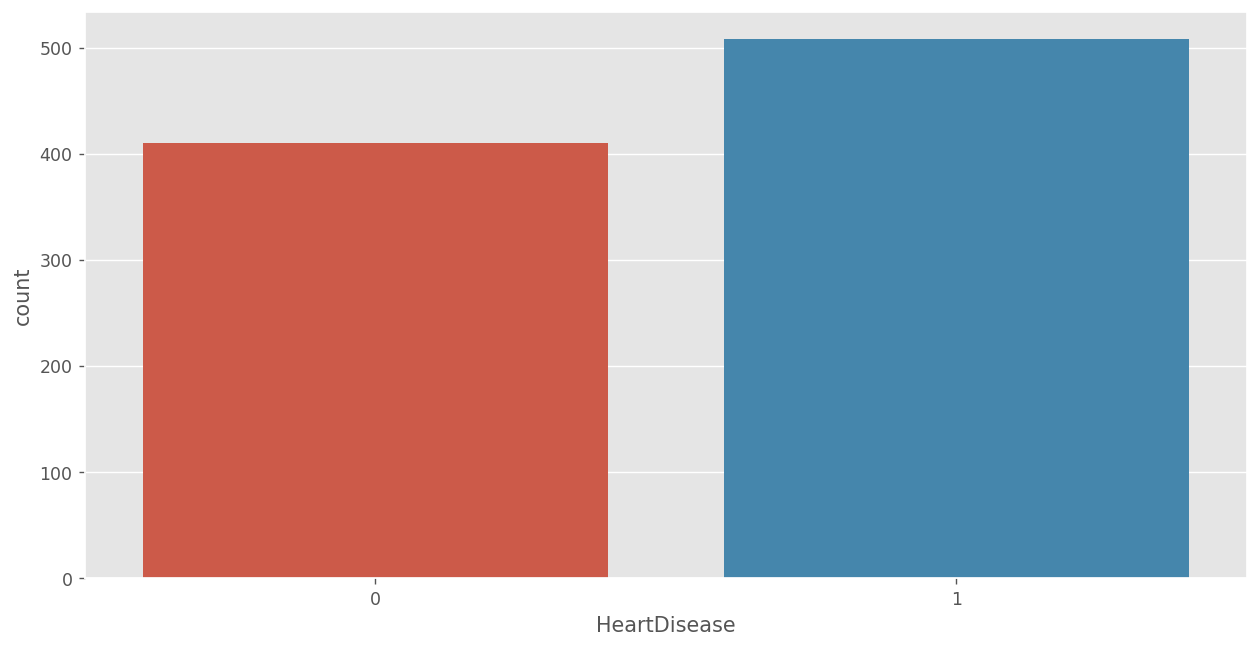

In [10]:
plt.figure(figsize = (12,6), dpi = 125)

sns.countplot(df['HeartDisease'])

In [11]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

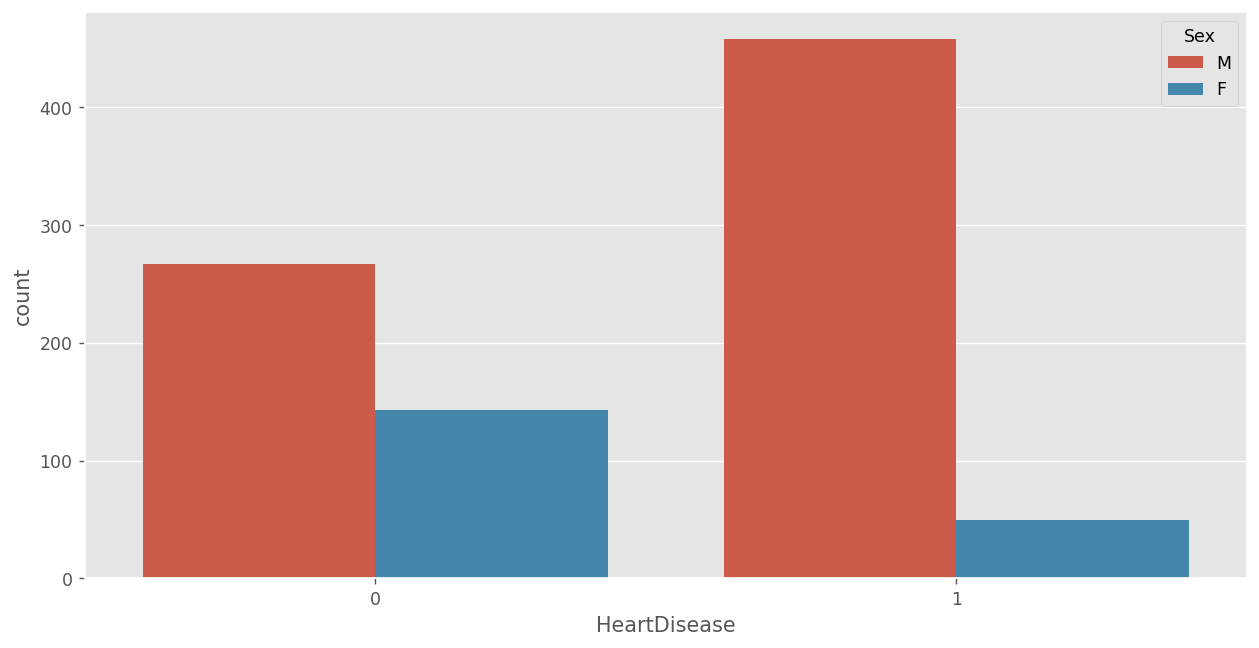

In [12]:
# HeartDisease vs Sex

plt.figure(figsize = (12,6), dpi = 125)

sns.countplot(df['HeartDisease'], hue = df['Sex'])

In [13]:
df.groupby('Sex')['HeartDisease'].value_counts()

Sex  HeartDisease
F    0               143
     1                50
M    1               458
     0               267
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

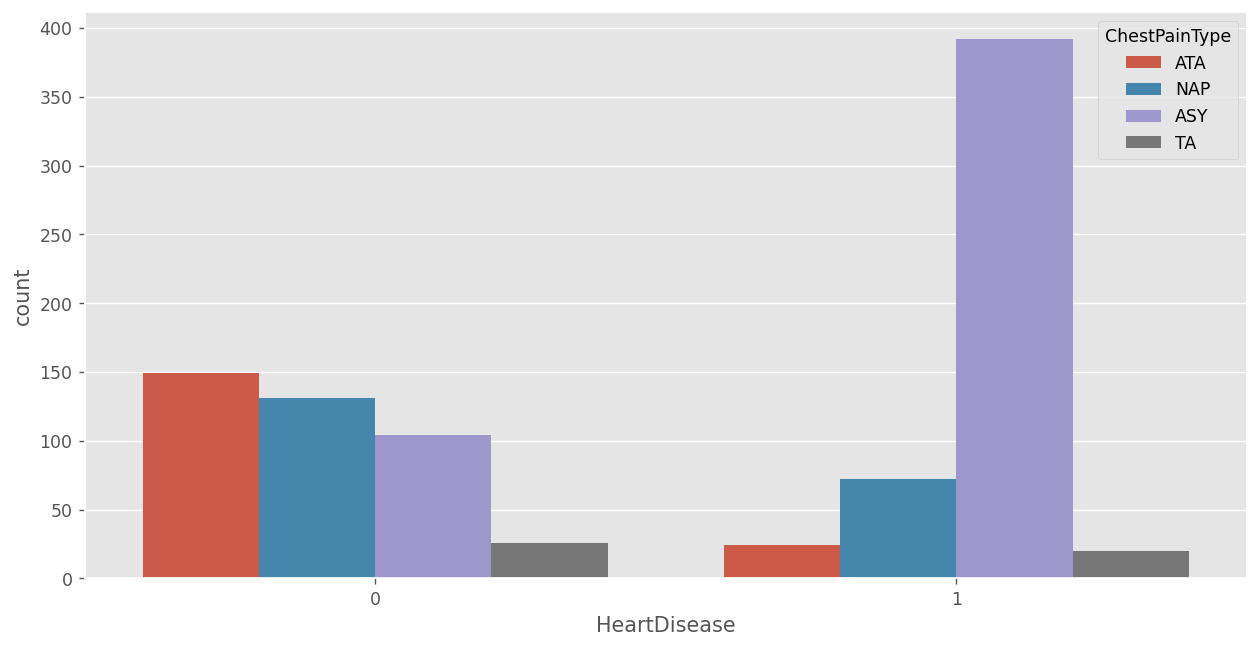

In [14]:
# HeartDisease vs ChestPainType

plt.figure(figsize = (12,6), dpi = 125)

sns.countplot(df['HeartDisease'], hue = df['ChestPainType'])

In [15]:
df.groupby('ChestPainType')['HeartDisease'].value_counts()

ChestPainType  HeartDisease
ASY            1               392
               0               104
ATA            0               149
               1                24
NAP            0               131
               1                72
TA             0                26
               1                20
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

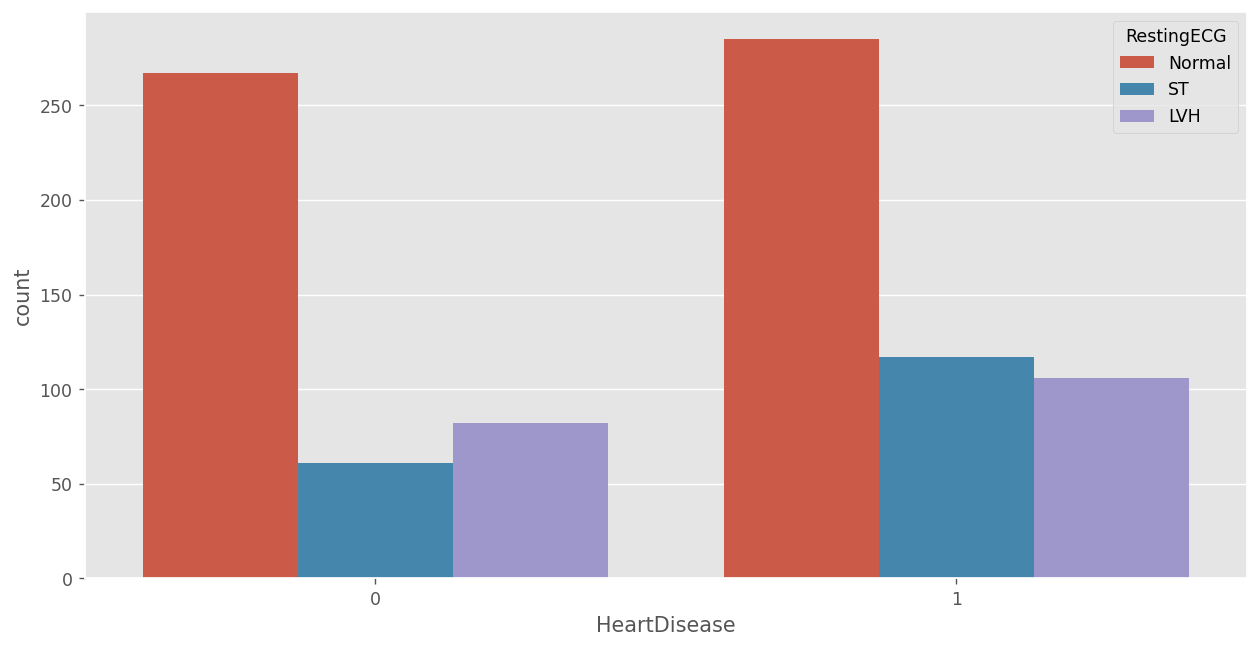

In [16]:
# HeartDisease vs RestingECG

plt.figure(figsize = (12,6), dpi = 125)

sns.countplot(df['HeartDisease'], hue = df['RestingECG'])

In [17]:
df.groupby('RestingECG')['HeartDisease'].value_counts()

RestingECG  HeartDisease
LVH         1               106
            0                82
Normal      1               285
            0               267
ST          1               117
            0                61
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

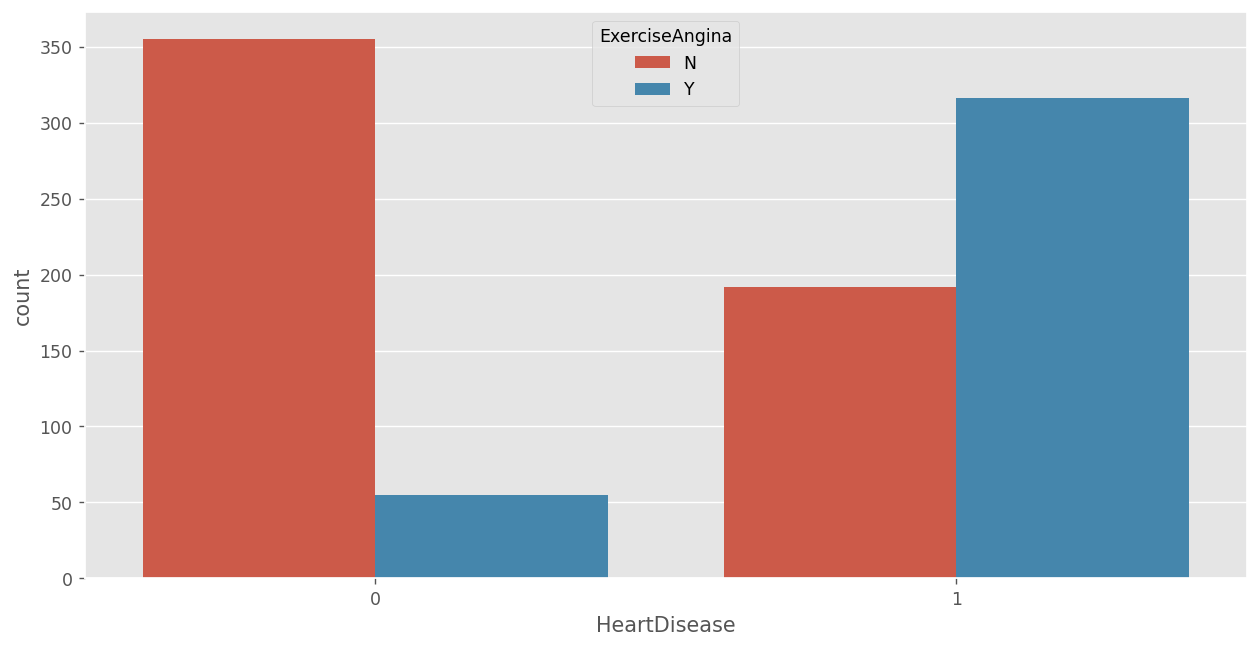

In [18]:
# HeartDisease vs ExerciseAngina

plt.figure(figsize = (12,6), dpi = 125)

sns.countplot(df['HeartDisease'], hue = df['ExerciseAngina'])

In [19]:
df.groupby('ExerciseAngina')['HeartDisease'].value_counts()

ExerciseAngina  HeartDisease
N               0               355
                1               192
Y               1               316
                0                55
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

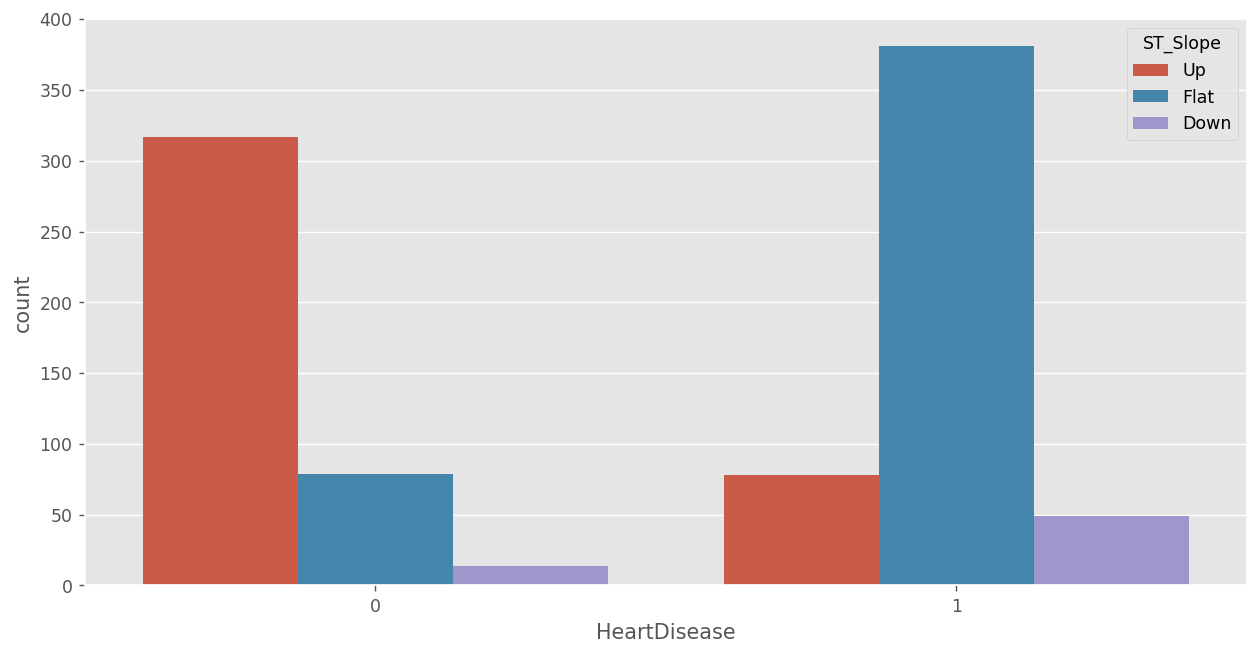

In [20]:
# HeartDisease vs ST_slope

plt.figure(figsize = (12,6), dpi = 125)

sns.countplot(df['HeartDisease'], hue = df['ST_Slope'])

In [21]:
df.groupby('ST_Slope')['HeartDisease'].value_counts()

ST_Slope  HeartDisease
Down      1                49
          0                14
Flat      1               381
          0                79
Up        0               317
          1                78
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

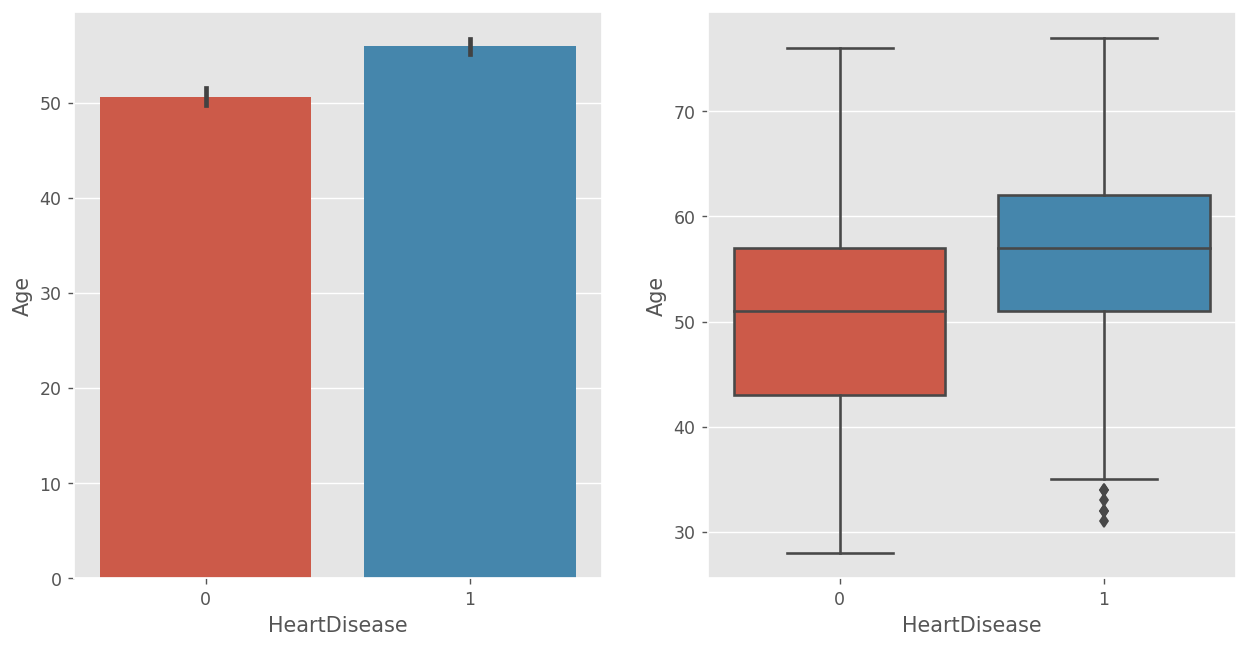

In [22]:
# HeartDisease vs Age

plt.figure(figsize = (12,6), dpi = 125)

plt.subplot(1,2,1)
sns.barplot(x = df['HeartDisease'], y = df['Age'])

plt.subplot(1,2,2)
sns.boxplot(x = df['HeartDisease'], y = df['Age'])

<AxesSubplot:xlabel='HeartDisease', ylabel='RestingBP'>

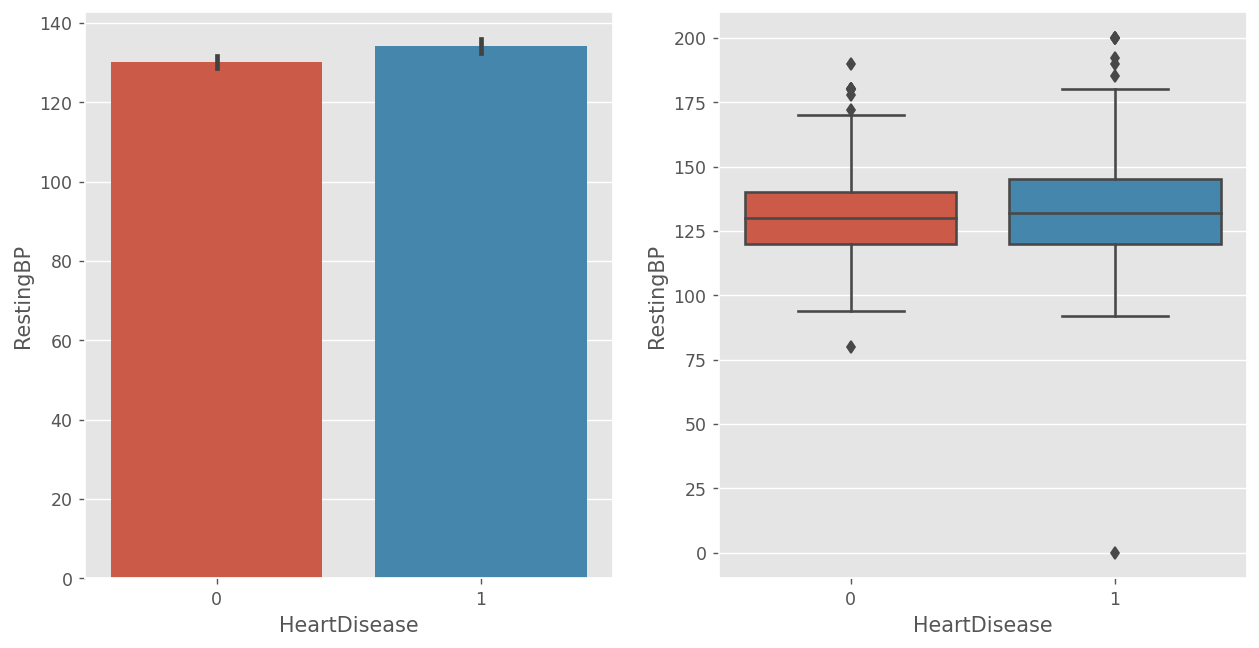

In [23]:
# HeartDisease vs RestingBP

plt.figure(figsize = (12,6), dpi = 125)

plt.subplot(1,2,1)
sns.barplot(x = df['HeartDisease'], y = df['RestingBP'])

plt.subplot(1,2,2)
sns.boxplot(x = df['HeartDisease'], y = df['RestingBP'])

In [24]:
df[df['RestingBP'] < 25]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

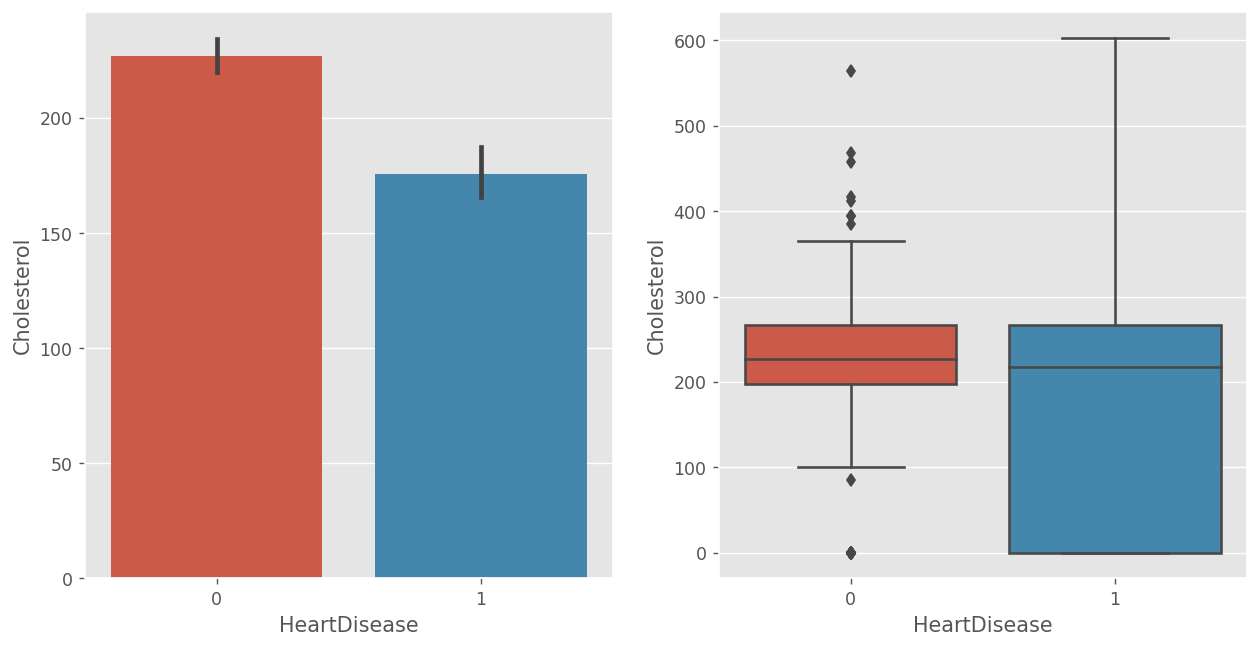

In [25]:
# HeartDisease vs Cholesterol

plt.figure(figsize = (12,6), dpi = 125)

plt.subplot(1,2,1)
sns.barplot(x = df['HeartDisease'], y = df['Cholesterol'])

plt.subplot(1,2,2)
sns.boxplot(x = df['HeartDisease'], y = df['Cholesterol'])

<AxesSubplot:xlabel='HeartDisease', ylabel='FastingBS'>

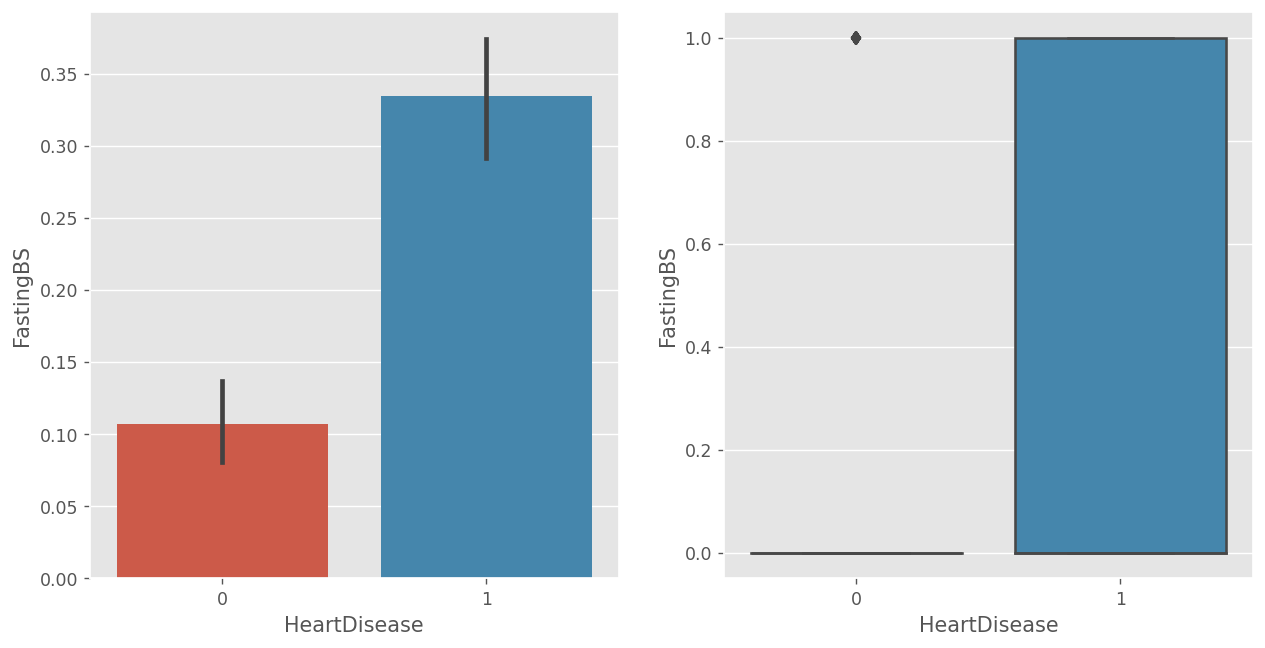

In [26]:
# HeartDisease vs FastingBS

plt.figure(figsize = (12,6), dpi = 125)

plt.subplot(1,2,1)
sns.barplot(x = df['HeartDisease'], y = df['FastingBS'])

plt.subplot(1,2,2)
sns.boxplot(x = df['HeartDisease'], y = df['FastingBS'])

<AxesSubplot:xlabel='HeartDisease', ylabel='MaxHR'>

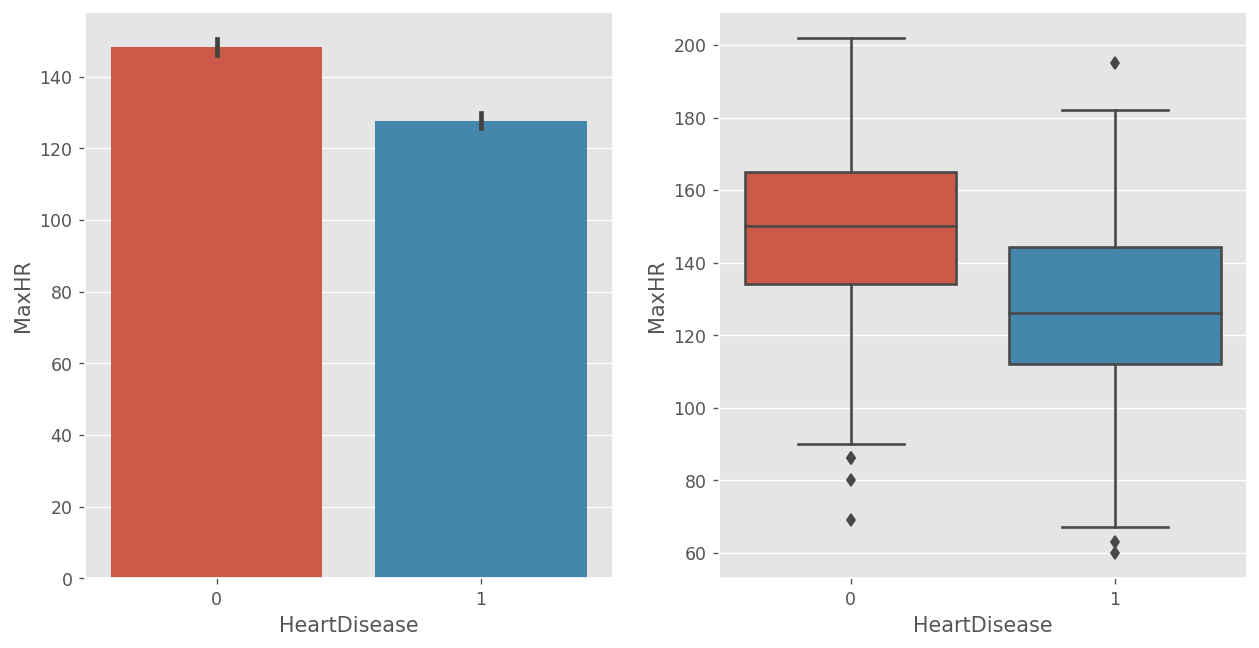

In [27]:
# HeartDisease vs MaxHR

plt.figure(figsize = (12,6), dpi = 125)

plt.subplot(1,2,1)
sns.barplot(x = df['HeartDisease'], y = df['MaxHR'])

plt.subplot(1,2,2)
sns.boxplot(x = df['HeartDisease'], y = df['MaxHR'])

<AxesSubplot:xlabel='HeartDisease', ylabel='Oldpeak'>

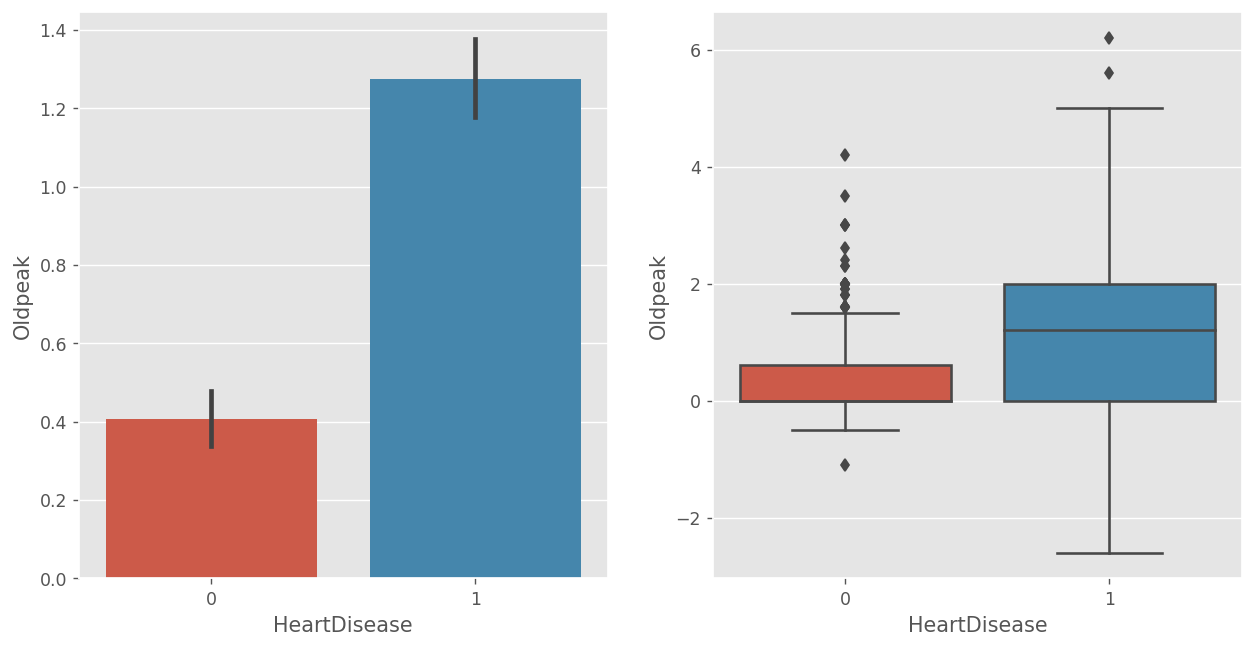

In [28]:
# HeartDisease vs Oldpeak

plt.figure(figsize = (12,6), dpi = 125)

plt.subplot(1,2,1)
sns.barplot(x = df['HeartDisease'], y = df['Oldpeak'])

plt.subplot(1,2,2)
sns.boxplot(x = df['HeartDisease'], y = df['Oldpeak'])

In [29]:
columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

X = df[columns]

Y = df[['HeartDisease']]

In [30]:
X[:5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [31]:
Y[:5]

,HeartDisease
0,0
1,1
2,0
3,1
4,0


In [32]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X[categorical_columns] = encoder.fit_transform(X[categorical_columns])

X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0


In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [34]:
print('Training Data Shape   : ', x_train.shape)

print('Training labels Shape : ', y_train.shape)

print('Testing Data shape    : ', x_test.shape)

print('Testing labels shape  : ', y_test.shape)

Training Data Shape   :  (734, 11)
Training labels Shape :  (734, 1)
Testing Data shape    :  (184, 11)
Testing labels shape  :  (184, 1)


In [35]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(x_train, y_train)

LogisticRegression()

In [36]:
print('Training Set Accuracy : ', classifier.score(x_train, y_train))

print('Testing Set  Accuracy : ', classifier.score(x_test,  y_test))

Training Set Accuracy :  0.837874659400545
Testing Set  Accuracy :  0.8967391304347826


In [37]:
x_test[0:5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
236,41,1.0,0.0,120,336,0,1.0,118,1.0,3.0,1.0
151,48,1.0,1.0,100,159,0,1.0,100,0.0,0.0,2.0
329,60,1.0,0.0,130,0,1,2.0,130,1.0,1.1,0.0
416,63,1.0,0.0,140,260,0,2.0,112,1.0,3.0,1.0
795,42,1.0,2.0,120,240,1,1.0,194,0.0,0.8,0.0


In [38]:
classifier.predict(x_test[0:5])

array([1, 0, 1, 1, 1], dtype=int64)

In [39]:
y_test[0:5]

,HeartDisease
236,1
151,0
329,1
416,1
795,0
